In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import os
import glob

In [45]:
import numpy as np
from tqdm import tqdm
actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
label_mapping = {action: idx for idx, action in enumerate(actions)}

PATH = '/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/code/lstm/dataset/1704553953'

data = []
labels = []

for action in tqdm(actions):
    file_path = glob.glob(os.path.join(PATH, f'seq_{action}*.npy'))[0]  # 이 부분을 실제 데이터가 있는 경로로 수정해야 합니다.
    try:
        loaded_data = np.load(file_path, allow_pickle=True)
        data.append(loaded_data)

        label = np.full((loaded_data.shape[0],), label_mapping[action])
        labels.append(label)
    except FileNotFoundError:
        print(f"File not found for action: {action}")

x_data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)


100%|██████████| 4/4 [00:00<00:00, 12.20it/s]


In [ ]:
actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]


PATH = '/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/code/lstm/dataset/1704528330'
data = np.concatenate([
    np.load(f'{PATH}/seq_hello_(679, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/seq_bread_house_(710, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/seq_lunch_(638, 30, 200).npy', allow_pickle=True),
    np.load(f'{PATH}/seq_NOISE_(691, 30, 200).npy', allow_pickle=True)
], axis=0)
# G:\내 드라이브\Sign_Remaster\Sign_Language_Remaster\code\lstm\dataset\1704116245\seq_lunch_200.npy
data.shape

(2718, 30, 200)

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2718, 30, 199)
(2718,)


In [46]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2386, 4)

In [47]:
from sklearn.model_selection import train_test_split

# data를 train과 test로 나눔
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# x_train, x_test, y_train, y_test의 크기 확인
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (1908, 30, 156)
y_train shape: (1908, 4)
x_test shape: (478, 30, 156)
y_test shape: (478, 4)


In [56]:
a,b,c,d =0,0,0,0
for i in y_test:
  if i[0] == 1:
    a += 1
  elif i[1] == 1:
    b += 1
  elif i[2] == 1:
    c += 1
  else:
    d += 1
print(a,b,c,d)

151 91 109 127


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='tanh', input_shape=x_train.shape[1:3]),
    Dense(32, activation='tanh'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                56576     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 58788 (229.64 KB)
Trainable params: 58788 (229.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    shuffle = False,
    # callbacks=[
    #     ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
    #     ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    # ]
)

Epoch 1/100
60/60 [==============================] - 3s 14ms/step - loss: 0.5853 - acc: 0.8365 - val_loss: 0.2278 - val_acc: 0.9623
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1018 - acc: 0.9932 - val_loss: 0.0433 - val_acc: 0.9979
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0217 - acc: 1.0000 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0023 - 

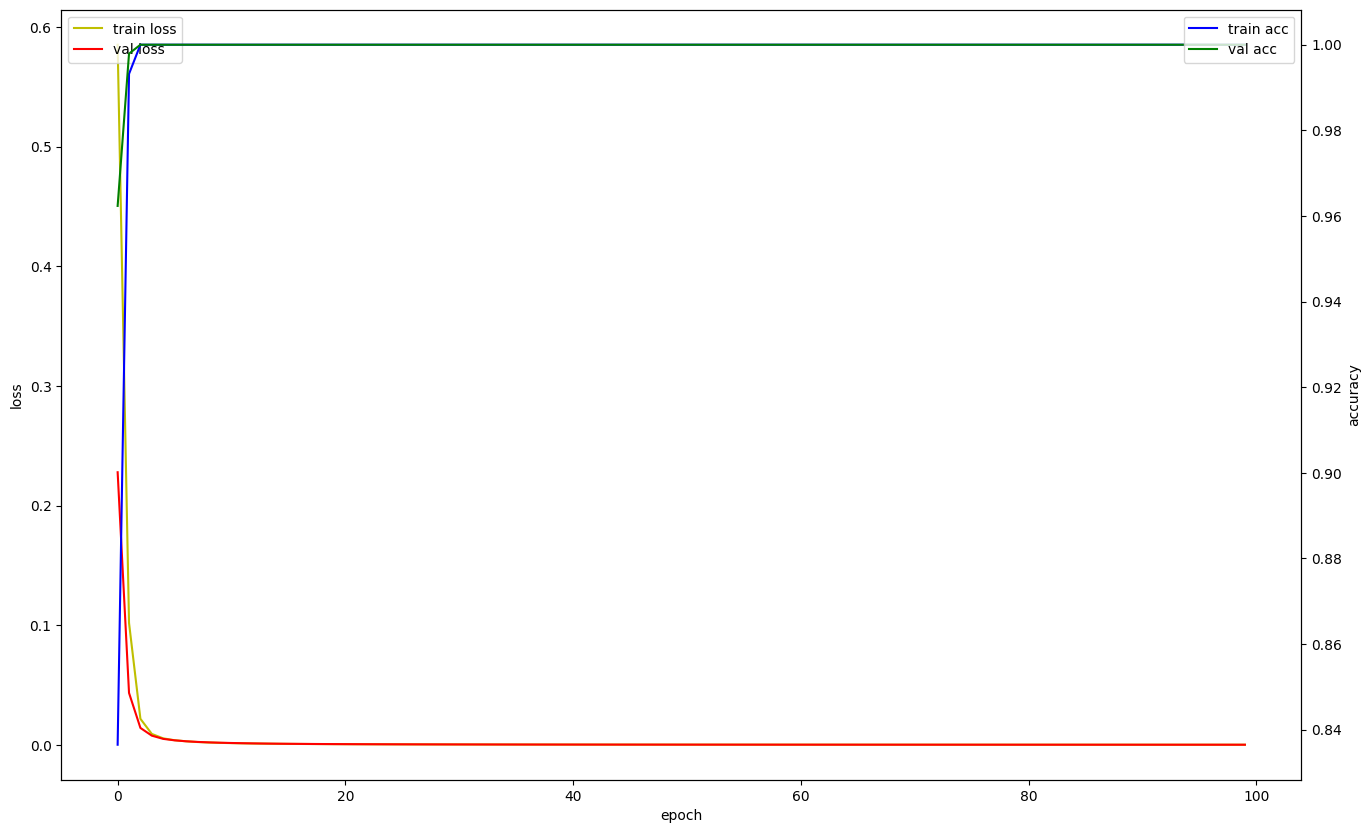

In [50]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [51]:
model.save(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test10_e100.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
from sklearn.metrics import accuracy_score
# model = load_model(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test8_e100.h5')
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)


15/15 [==============================] - 0s 2ms/step
Accuracy: 1.0


# test

In [2]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
seq_length = 30

model = load_model(r"C:\PlayData\lstm_test10_e100.h5")

In [2]:
model.input_shape

(None, 30, 156)

In [5]:

import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

actions = [
    'hello',
    'bread_house',
    'lunch',
    'NOISE'
]
seq_length = 30

# model = load_model('G:\내 드라이브\Sign_Remaster\Sign_Language_Remaster\model\lstm_test1.h5')

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)


data = np.zeros((1, 156))
action_seq = []

while cap.isOpened():
    ret, img = cap.read()
    # img0 = img.copy()

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        da = []
        if len(result.multi_hand_landmarks) == 2:
            d= []
            for res in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                # Compute angles between joints
                v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
                v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint
                v = v2 - v1 # [20, 3]
                # Normalize v
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                # Get angle using arcos of dot product
                angle = np.arccos(np.einsum('nt,nt->n',
                    v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:],
                    v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]

                angle = np.degrees(angle) # Convert radian to degree
                #######################################
                angle = np.array([angle],dtype== np.float32)
                d.append(np.concatenate([joint.flatten(),angle.flatten()]))
            da.append([np.concatenate(d)])
            # data.append(np.concatenate(da))
            if data.size != 0:
                data = np.vstack([data,np.concatenate(da)])
            else:
                data = da

        elif len(result.multi_hand_landmarks)==1:
            d = []
            for res in result.multi_hand_landmarks:  # res 잡힌 만큼 (max 손 개수 이하)
                # mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                # Compute angles between joints
                v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
                v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint
                v = v2 - v1 # [20, 3]
                # Normalize v
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                # Get angle using arcos of dot product
                angle = np.arccos(np.einsum('nt,nt->n',
                    v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:],
                    v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]\

                angle = np.degrees(angle) # Convert radian to degree

                angle = np.array([angle], dtype=np.float32)
                d.append(np.concatenate([joint.flatten(),angle.flatten()]))

            d.append(np.zeros_like(d[0]))
            da.append([np.concatenate(d)])

            if data.size != 0:
                data = np.vstack([data,np.concatenate(da)])
            else:
                data = da
        if len(data) < seq_length:
            continue

        input_data = np.expand_dims(np.array(data[-seq_length:], dtype=np.float32), axis=0)
        print('#####33',input_data.shape)
        y_pred = model.predict(input_data).squeeze()

        i_pred = int(np.argmax(y_pred))
        conf = y_pred[i_pred]

        if conf < 0.9:
            continue

        action = actions[i_pred]
        action_seq.append(action)

        if len(action_seq) < 3:
            continue

        this_action = '?'
        if action_seq[-1] == action_seq[-2] == action_seq[-3]:
            this_action = action

        cv2.putText(img, f'{this_action.upper()}',org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

    # out.write(img0)
    # out2.write(img)
    cv2.imshow('img', img)
    if cv2.waitKey(1) == ord('q'):
        cv2.destroyAllWindows()
        break


#####33 (1, 30, 156)
1/1 [==============================] - 0s 20ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 23ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 20ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 20ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 16ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 21ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 21ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 23ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 28ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 19ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 20ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 20ms/step
#####33 (1, 30, 156)
1/1 [==============================] - 0s 19ms/step
#####33 (1, 30, 156)
1/1 [=========================